In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
crime_df = pd.read_csv("crime_data.csv")
print(crime_df.head())
print(crime_df.describe())

   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6
         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000


# HC clustering

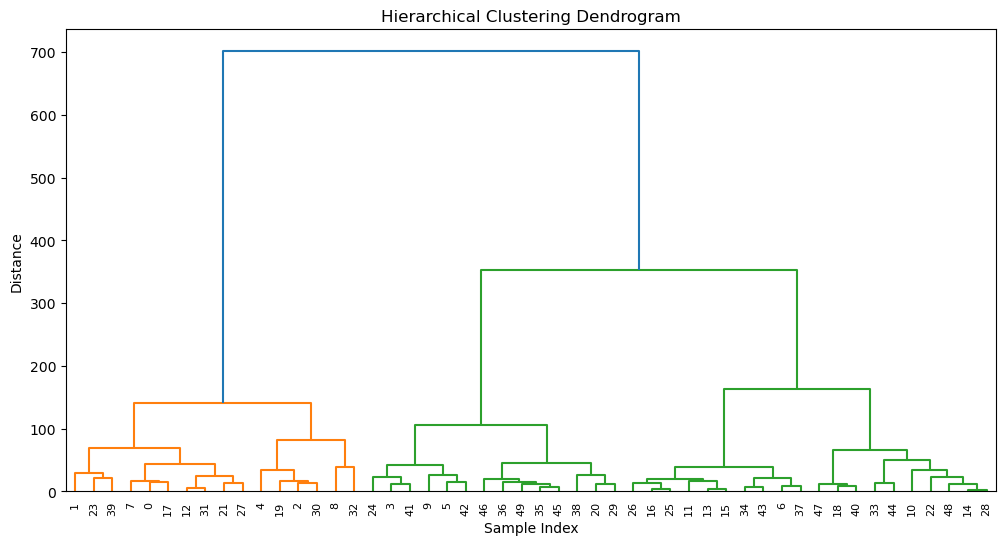

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(crime_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


# K means clustering

In [8]:
from sklearn.cluster import KMeans

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(crime_data)

# Print the cluster labels
print(kmeans.labels_)


[2 2 2 1 2 1 0 2 2 1 0 0 2 0 0 0 0 2 0 2 1 2 0 2 1 0 0 2 0 1 2 2 2 0 0 1 1
 0 1 2 0 1 1 0 0 1 1 0 0 1]


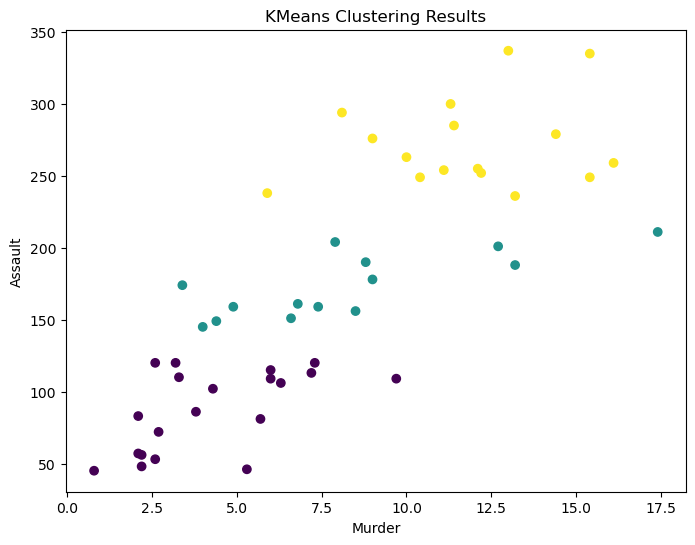

In [10]:
# Add the cluster labels to the original DataFrame
crime_data['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(crime_data['Murder'], crime_data['Assault'], c=crime_data['Cluster'])
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.title('KMeans Clustering Results')
plt.show()


# DBSCAN

In [9]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=2000, min_samples=5)
dbscan.fit(crime_data)

# Print the cluster labels
print(dbscan.labels_)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


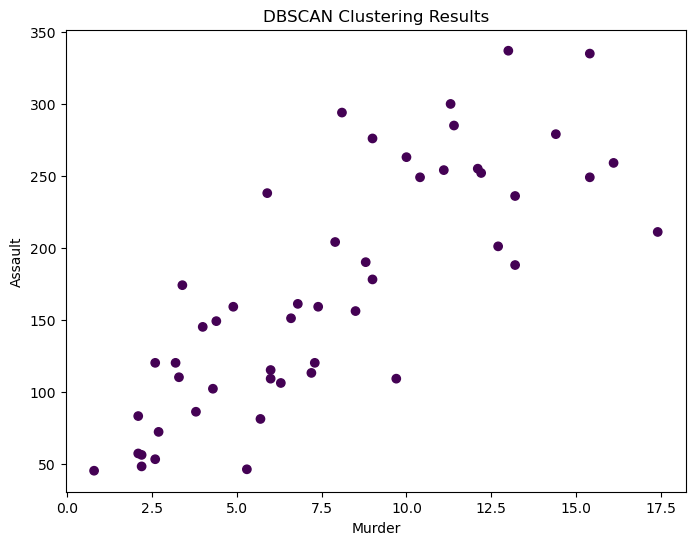

In [12]:
# Add the cluster labels to the original DataFrame
crime_data['Cluster'] = dbscan.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(crime_data['Murder'], crime_data['Assault'], c=crime_data['Cluster'])
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.title('DBSCAN Clustering Results')
plt.show()
